## 5. NLP基础

自然语言处理（Natural Language Processing, 简称NLP）是计算机科学与语言学中关注于计算机与人类语言间转换的领域.


### 文本预处理

文本处理的基本方法：
- 分词
- 词性标注
- 命名实体识别
       
文本张量表示方法：
- one-hot编码
- Word2vec
- Word Embedding

文本语料的数据分析：
- 标签数量分布
- 句子长度分布
- 词频统计与关键词词云

文本特征处理：
- 添加n-gram特征
- 文本长度规范

数据增强方法：
- 回译数据增强法

## 1. 文本处理的基本方法：

### 1.1分词


In [1]:
import jieba
# 精确 < 搜索引擎 < 全模式
content = "工信处女干事每月经过下属科室都要亲口交代24口交换机等技术性器件的安装工作"
print(jieba.lcut(content, cut_all=False)) #精确
print(jieba.lcut(content, cut_all=True)) #全
print(jieba.lcut_for_search(content)) #搜索

# 词典格式: 每一行分三部分：词语、词频（可省略）、词性（可省略）
# jieba.load_userdict("./userdict.txt")

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.548 seconds.
Prefix dict has been built successfully.


['工信处', '女干事', '每月', '经过', '下属', '科室', '都', '要', '亲口', '交代', '24', '口', '交换机', '等', '技术性', '器件', '的', '安装', '工作']
['工信处', '处女', '女干事', '干事', '每月', '月经', '经过', '下属', '科室', '都', '要', '亲口', '口交', '交代', '24', '口交', '交换', '交换机', '换机', '等', '技术', '技术性', '性器', '器件', '的', '安装', '安装工', '装工', '工作']
['工信处', '干事', '女干事', '每月', '经过', '下属', '科室', '都', '要', '亲口', '交代', '24', '口', '交换', '换机', '交换机', '等', '技术', '技术性', '器件', '的', '安装', '工作']


In [4]:
import hanlp
tokenizer = hanlp.load('CTB6_CONVSEG')
print(tokenizer("工信处女干事每月经过下属科室都要亲口交代24口交换机等技术性器件的安装工作"))
# tokenizer = hanlp.utils.rules.tokenize_english
# print(tokenizer('Mr. Hankcs bought hankcs.com for 1.5 thousand dollars.'))

['工信处', '女', '干事', '每', '月', '经过', '下属', '科室', '都', '要', '亲口', '交代', '24', '口', '交换机', '等', '技术性', '器件', '的', '安装', '工作']


### 1.2 命名实体识别


In [6]:
# ner
recognizer_chinese = hanlp.load(hanlp.pretrained.ner.MSRA_NER_BERT_BASE_ZH)
print(recognizer_chinese(list('上海华安工业（集团）公司董事长谭旭光和秘书张晚霞来到美国纽约现代艺术博物馆参观。')))
# recognizer_en = hanlp.load(hanlp.pretrained.ner.CONLL03_NER_BERT_BASE_UNCASED_EN)
# print(recognizer(["President", "Obama", "is", "speaking", "at", "the", "White", "House"]))

[('上海华安工业（集团）公司', 'NT', 0, 12), ('谭旭光', 'NR', 15, 18), ('张晚霞', 'NR', 21, 24), ('美国', 'NS', 26, 28), ('纽约现代艺术博物馆', 'NS', 28, 37)]


### 1.3 词性标注


In [2]:
import jieba.posseg as pseg
pseg.lcut("我爱北京天安门") 
# 结果返回一个装有pair元组的列表, 每个pair元组中分别是词汇及其对应的词性, 具体词性含义请参照[附录: jieba词性对照表]()

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.539 seconds.
Prefix dict has been built successfully.


[pair('我', 'r'), pair('爱', 'v'), pair('北京', 'ns'), pair('天安门', 'ns')]

## 2. 文本张量表示
### 2.1 one-hot

In [7]:
# one-hot
import joblib
from keras.preprocessing.text import Tokenizer
vocab = {"周杰伦", "陈奕迅", "王力宏", "李宗盛", "吴亦凡", "鹿晗"}
t = Tokenizer(num_words=None,char_level=False)
t.fit_on_texts(vocab)

for token in vocab:
    zero_l = [0]*len(vocab)
    token_index = t.texts_to_sequences([token])[0][0] - 1
    zero_l[token_index] = 1
    print(token,zero_l)

tokenizer_path = "./Tokenizer"
joblib.dump(t, tokenizer_path)

周杰伦 [1, 0, 0, 0, 0, 0]
陈奕迅 [0, 1, 0, 0, 0, 0]
吴亦凡 [0, 0, 1, 0, 0, 0]
李宗盛 [0, 0, 0, 1, 0, 0]
王力宏 [0, 0, 0, 0, 1, 0]
鹿晗 [0, 0, 0, 0, 0, 1]


['./Tokenizer']

In [8]:
# 导入用于对象保存与加载的joblib
# 加载之前保存的Tokenizer, 实例化一个t对象
t = joblib.load(tokenizer_path)

# 编码token为"李宗盛"
token = "李宗盛"
# 使用t获得token_index
token_index = t.texts_to_sequences([token])[0][0] - 1
# 初始化一个zero_list
zero_list = [0]*len(vocab)
# 令zero_List的对应索引为1
zero_list[token_index] = 1
print(token, "的one-hot编码为:", zero_list) 

李宗盛 的one-hot编码为: [0, 0, 0, 1, 0, 0]


### 2.2 word2vec
- CBOW : 连续词袋模型 上下文 -> 当前词
    <img src='cbow.jpg'>
- skipgram: 当前词 -> 上下文
    <img src='skipgram.jpg'>

In [1]:
import os
os.getcwd()

'/home/yangcaihua/task/pytorch'

In [7]:
import fasttext
# fastText是一个由Facebook的AI Research实验室创建的用于学习单词嵌入和文本分类的库。
model = fasttext.train_unsupervised('data/fil9')

Read 124M words
Number of words:  218316
Number of labels: 0
Progress: 100.0% words/sec/thread:   29414 lr:  0.000000 avg.loss:  1.731602 ETA:   0h 0m 0s


In [2]:
model.get_word_vector('the')

array([ 2.69205589e-02,  2.30061367e-01, -3.65144938e-01, -2.39198774e-01,
       -2.10951000e-01, -3.49523015e-02, -2.98360080e-01,  1.26202092e-01,
       -1.91931918e-01, -1.73507586e-01,  3.21475826e-02,  3.98904681e-01,
       -3.45306575e-01, -2.79143542e-01, -2.92520642e-01, -1.00824766e-01,
       -2.14432538e-01, -8.48380402e-02,  1.00462444e-01, -2.47067660e-01,
        2.91214347e-01, -2.00514883e-01,  1.30885229e-01,  2.30348542e-01,
       -1.78399593e-01, -1.67363569e-01, -2.04133019e-01,  5.42510264e-02,
       -7.66217858e-02,  2.31016010e-01, -9.47944149e-02,  1.36297151e-01,
       -1.36969671e-01,  2.28665426e-01, -1.21504930e-03,  1.35399342e-01,
        1.72503993e-01, -1.25803933e-01, -1.47565395e-01,  4.75212522e-02,
       -5.23463339e-02,  1.28065884e-01,  2.61622071e-01, -3.92485350e-01,
        1.45487795e-02, -3.62185657e-01,  1.34703085e-01, -6.53091446e-02,
        8.80513061e-03, -1.09075107e-01,  5.23483865e-02,  3.67859788e-02,
        1.78136766e-01, -

In [ ]:
# 超参数设定
model = fasttext.train_unsupervised('data/fil9','cbow',dim=300,epoch=1,lr=0.1)

In [3]:
model.get_nearest_neighbors('sport')

[(0.8628491163253784, 'sports'),
 (0.8562147617340088, 'sporting'),
 (0.8101190328598022, 'competitions'),
 (0.7868378162384033, 'competiting'),
 (0.7803624868392944, 'competitve'),
 (0.7715709209442139, 'showjumping'),
 (0.7693371176719666, 'racing'),
 (0.7683256268501282, 'bobsledding'),
 (0.7667173743247986, 'competetive'),
 (0.7624735832214355, 'motorsports')]

In [4]:
model.save_model('data/fil9.bin')

In [6]:
model1 = fasttext.load_model('data/fil9.bin')
model1.get_nearest_neighbors('the')

[(0.8778159022331238, 'of'),
 (0.8254445195198059, 'in'),
 (0.8137810826301575, 'and'),
 (0.7640159130096436, 'is'),
 (0.7141677141189575, 'a'),
 (0.6936720013618469, 'for'),
 (0.6755514144897461, 'with'),
 (0.6650180816650391, 'one'),
 (0.66267329454422, 'to'),
 (0.6598842740058899, 'which')]

### 2.3 word embedding

In [12]:
# word embedding 通过一定的方式将词汇映射到指定维度(一般是更高维度)的空间.
# https://zhuanlan.zhihu.com/p/33786815
import torch
import json
import fileinput
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()
e = torch.randn(100,50)
meta = list(map(lambda x:x.strip(),fileinput.FileInput('data/vocab100.csv')))
writer.add_embedding(e,meta)
# google能展示
writer.close()

AttributeError: module 'tensorflow._api.v2.io.gfile' has no attribute 'get_filesystem'

<img src='word vector.jpg'>

In [10]:
print(torch.cuda.is_available())
print(torch.version.cuda)
print(torch.backends.cudnn.version())
import tensorflow as tf
print(tf.test.is_gpu_available())
print(tf.__version__)
print(tf.test.is_gpu_available(cuda_only=False,min_cuda_compute_capability=None))

True
10.2
7605
False
2.8.0
False


2022-03-17 23:21:30.321372: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-03-17 23:21:30.323400: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


## 3.文本语料的数据分析：
### 3.1标签数量分布


/tmp/ipykernel_16569/1016553222.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv("./data/hotel_train.tsv", sep="    ")
/tmp/ipykernel_16569/1016553222.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  valid_data = pd.read_csv("./data/hotel_test.tsv", sep="    ")
/home/yangcaihua/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misint

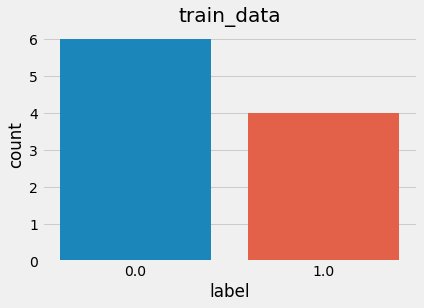

/home/yangcaihua/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


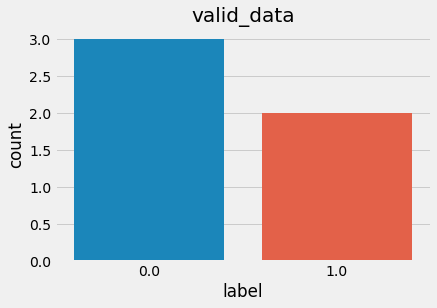

In [10]:
# 文本数据分析：检查语料存在的问题，以便后续超参数的选择
# 标签分布 句子长度分布 词频统计与关键词词云
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# 设置显示风格
plt.style.use('fivethirtyeight') 

# 分别读取训练tsv和验证tsv
train_data = pd.read_csv("./data/hotel_train.tsv", sep="    ")
valid_data = pd.read_csv("./data/hotel_test.tsv", sep="    ")


# 获得训练数据标签数量分布
sns.countplot("label", data=train_data)
plt.title("train_data")
plt.show()


# 获取验证数据标签数量分布
sns.countplot("label", data=valid_data)
plt.title("valid_data")
plt.show()

### 3.2 句子长度分布


/home/yangcaihua/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


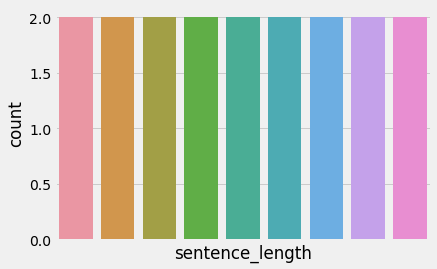

/home/yangcaihua/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


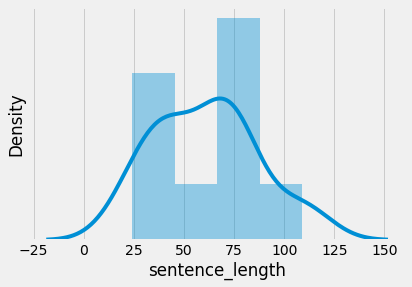

/home/yangcaihua/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


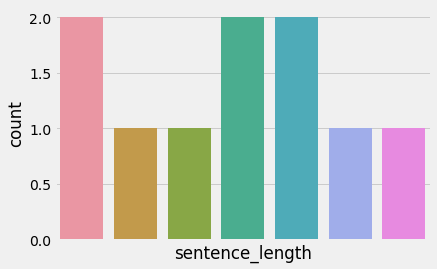

/home/yangcaihua/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


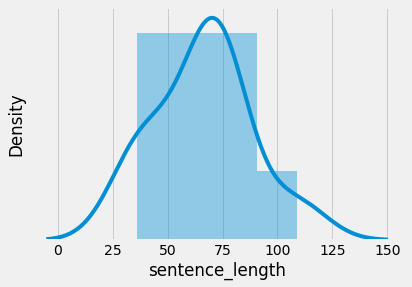

In [11]:
# 柱状图
# 在训练数据中添加新的句子长度列, 每个元素的值都是对应的句子列的长度
train_data["sentence_length"] = list(map(lambda x: len(x), train_data["sentence"]))

# 绘制句子长度列的数量分布图
sns.countplot("sentence_length", data=train_data)
# 主要关注count长度分布的纵坐标, 不需要绘制横坐标, 横坐标范围通过dist图进行查看
plt.xticks([])

plt.show()

# 绘制dist长度分布图
sns.distplot(train_data["sentence_length"])

# 主要关注dist长度分布横坐标, 不需要绘制纵坐标
plt.yticks([])
plt.show()


# 在验证数据中添加新的句子长度列, 每个元素的值都是对应的句子列的长度
valid_data["sentence_length"] = list(map(lambda x: len(x), valid_data["sentence"]))

# 绘制句子长度列的数量分布图
sns.countplot("sentence_length", data=valid_data)

# 主要关注count长度分布的纵坐标, 不需要绘制横坐标, 横坐标范围通过dist图进行查看
plt.xticks([])
plt.show()

# 绘制dist长度分布图
sns.distplot(valid_data["sentence_length"])

# 主要关注dist长度分布横坐标, 不需要绘制纵坐标
plt.yticks([])
plt.show()

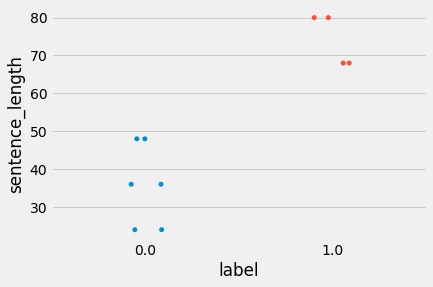

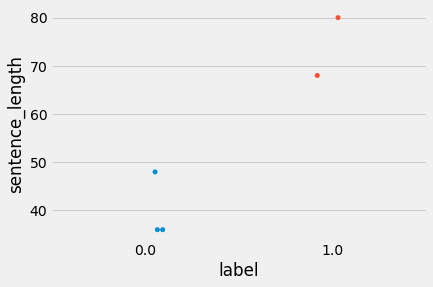

In [12]:
# 散点分布 有助于找到异常点

# 绘制训练集长度分布的散点图
sns.stripplot(y='sentence_length',x='label',data=train_data)
plt.show()

# 绘制验证集长度分布的散点图
sns.stripplot(y='sentence_length',x='label',data=valid_data)
plt.show()

In [46]:
# 导入jieba用于分词
# 导入chain方法用于扁平化列表
import jieba
from itertools import chain

# 进行训练集的句子进行分词, 并统计出不同词汇的总数
# * 析取
train_vocab = set(chain(*map(lambda x: jieba.lcut(x), train_data["sentence"])))
print("训练集共包含不同词汇总数为：", len(train_vocab))

# 进行验证集的句子进行分词, 并统计出不同词汇的总数
valid_vocab = set(chain(*map(lambda x: jieba.lcut(x), valid_data["sentence"])))
print("训练集共包含不同词汇总数为：", len(valid_vocab))

训练集共包含不同词汇总数为： 190
训练集共包含不同词汇总数为： 172


In [45]:
# list(chain(list('wosh')))
# set(chain(*map(lambda x: jieba.lcut(x), valid_data["sentence"])))

### 3.3 词频统计与关键词词云

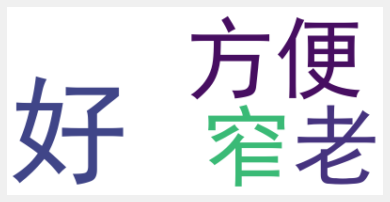

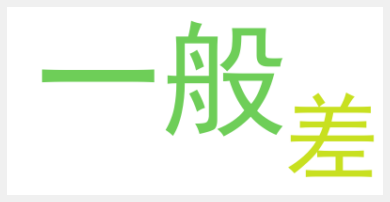

In [50]:
# 高频形容词词云 识别错误，便于人工审查
# 使用jieba中的词性标注功能
import jieba.posseg as pseg

def get_a_list(text):
    """用于获取形容词列表"""
    # 使用jieba的词性标注方法切分文本,获得具有词性属性flag和词汇属性word的对象, 
    # 从而判断flag是否为形容词,来返回对应的词汇
    r = []
    for g in pseg.lcut(text):
        if g.flag == "a":
            r.append(g.word)
    return r

# 导入绘制词云的工具包
from wordcloud import WordCloud

def get_word_cloud(keywords_list):
    # 实例化绘制词云的类, 其中参数font_path是字体路径, 为了能够显示中文, 
    # max_words指词云图像最多显示多少个词, background_color为背景颜色 
    wordcloud = WordCloud(font_path="./data/SimHei.ttf", max_words=100, background_color="white")
    # 将传入的列表转化成词云生成器需要的字符串形式
    keywords_string = " ".join(keywords_list)
    # 生成词云
    wordcloud.generate(keywords_string)

    # 绘制图像并显示
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# 获得训练集上正样本
p_train_data = train_data[train_data["label"]==1]["sentence"]

# 对正样本的每个句子的形容词
train_p_a_vocab = chain(*map(lambda x: get_a_list(x), p_train_data))
#print(train_p_n_vocab)

# 获得训练集上负样本
n_train_data = train_data[train_data["label"]==0]["sentence"]

# 获取负样本的每个句子的形容词
train_n_a_vocab = chain(*map(lambda x: get_a_list(x), n_train_data))

# 调用绘制词云函数
get_word_cloud(train_p_a_vocab)
get_word_cloud(train_n_a_vocab)

## 4. 文本特征处理：
### 4.1 添加n-gram特征


In [57]:
# 文本特征处理：n-gram 和 长度规范
# 一般n-gram中的n取2或者3, 这里取2为例
ngram_range = 2

def create_ngram_set(input_list):
    """
    description: 从数值列表中提取所有的n-gram特征
    :param input_list: 输入的数值列表, 可以看作是词汇映射后的列表, 
                       里面每个数字的取值范围为[1, 25000]
    :return: n-gram特征组成的集合

    eg:
    >>> create_ngram_set([1, 4, 9, 4, 1, 4])
    {(4, 9), (4, 1), (1, 4), (9, 4)}
    """ 
    # return set(zip(*[input_list[i:] for i in range(ngram_range)]))
    return set(zip(*[input_list[i:] for i in range(ngram_range)]))

In [56]:
list(create_ngram_set([1, 4, 9, 4, 1, 4]))
list(zip([0,1,2,3],[4]))

[(0, 4)]

In [58]:
input_list = [1, 3, 2, 1, 5, 3]
res = create_ngram_set(input_list)
print(res)

{(2, 1), (1, 5), (5, 3), (3, 2), (1, 3)}


### 4.2 文本长度规范


In [62]:
# 文本长度规范 padding
from keras.preprocessing import sequence

# cutlen根据数据分析中句子长度分布，覆盖90%左右语料的最短长度.
# 这里假定cutlen为10
cutlen = 10

def padding(x_train):
    """
    description: 对输入文本张量进行长度规范
    :param x_train: 文本的张量表示, 形如: [[1, 32, 32, 61], [2, 54, 21, 7, 19]]
    :return: 进行截断补齐后的文本张量表示 
    """
    # 使用sequence.pad_sequences即可完成
    return sequence.pad_sequences(x_train, cutlen)
    


2022-03-15 01:11:19.035786: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-15 01:11:19.035818: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [63]:
# 假定x_train里面有两条文本, 一条长度大于10, 一天小于10
x_train = [[1, 23, 5, 32, 55, 63, 2, 21, 78, 32, 23, 1],
           [2, 32, 1, 23, 1]]

res = padding(x_train)
print(res)


[[ 5 32 55 63  2 21 78 32 23  1]
 [ 0  0  0  0  0  2 32  1 23  1]]


## 5. 数据增强方法：
### 5.1 回译数据增强法

In [85]:
# 文本增强 回译
# 假设取两条已经存在的正样本和两条负样本
# 将基于这四条样本产生新的同标签的四条样本
p_sample1 = "酒店设施非常不错"
p_sample2 = "这家价格很便宜"
n_sample1 = "拖鞋都发霉了, 太差了"
n_sample2 = "电视不好用, 没有看到足球"

# 导入google翻译接口工具
# from googletrans import Translator
import os
os.chdir('/home/yangcaihua')
from download.google_trans_new.google_trans_new import google_translator  
# 实例化翻译对象
translator = google_translator()

# 进行第一次批量翻译, 翻译目标是韩语
translations = translator.translate([p_sample1, p_sample2, n_sample1, n_sample2], 'ko')
# 获得翻译后的结果
# ko_res = list(map(lambda x: x, translations))
ko_res =  translations
# 打印结果
print("中间翻译结果:")
print(ko_res)


# 最后在翻译回中文, 完成回译全部流程
translations = translator.translate(ko_res, 'zh-cn')
# cn_res = list(map(lambda x: x, translations))
cn_res = translations
print("回译得到的增强数据:")
print(cn_res)



中间翻译结果:
[ '호텔 시설은 매우 좋습니다.'이 가격은 매우 저렴합니다. 
回译得到的增强数据:
['酒店设施非常好。'这个价格很便宜。 


In [77]:
# 导入Google翻译接口工具 pip官方工具没有更新
# from google_trans_new import google_translator
import os
os.chdir('/home/yangcaihua')
from download.google_trans_new.google_trans_new import google_translator  
# 实例化翻译对象
translator = google_translator(timeout=10)
sample1 = "测试翻译工具"
# 进行第一次翻译，目标是韩文
translations =  translator.translate([sample1,sample1], 'ko')
# 获得翻译结果
print("中间翻译结果是",translations)

中间翻译结果是 [ '번역 도구 테스트', 'Test Translation Tool'] 


In [76]:
import os
os.chdir('/home/yangcaihua')
from download.google_trans_new.google_trans_new import google_translator  
translator = google_translator()  
translate_text = translator.translate('สวัสดีจีน',lang_tgt='en')  
print(translate_text)


Hello Chinese 


http://121.199.45.168:8003/1/#14

jieba词性对照表:

- a 形容词  
    - ad 副形词  
    - ag 形容词性语素  
    - an 名形词  
- b 区别词  
- c 连词  
- d 副词  
    - df   
    - dg 副语素  
- e 叹词  
- f 方位词  
- g 语素  
- h 前接成分  
- i 成语 
- j 简称略称  
- k 后接成分  
- l 习用语  
- m 数词  
    - mg 
    - mq 数量词  
- n 名词  
    - ng 名词性语素  
    - nr 人名  
    - nrfg    
    - nrt  
    - ns 地名  
    - nt 机构团体名  
    - nz 其他专名  
- o 拟声词  
- p 介词  
- q 量词  
- r 代词  
    - rg 代词性语素  
    - rr 人称代词  
    - rz 指示代词  
- s 处所词  
- t 时间词  
    - tg 时语素  
- u 助词  
    - ud 结构助词 得
    - ug 时态助词
    - uj 结构助词 的
    - ul 时态助词 了
    - uv 结构助词 地
    - uz 时态助词 着
- v 动词  
    - vd 副动词
    - vg 动词性语素  
    - vi 不及物动词  
    - vn 名动词  
    - vq 
- x 非语素词  
- y 语气词  
- z 状态词  
    - zg 

hanlp词性对照表:

【Proper Noun——NR，专有名词】

【Temporal Noun——NT，时间名词】

【Localizer——LC，定位词】如“内”，“左右”

【Pronoun——PN，代词】

【Determiner——DT，限定词】如“这”，“全体”

【Cardinal Number——CD，量词】

【Ordinal Number——OD，次序词】如“第三十一”

【Measure word——M，单位词】如“杯”

【Verb：VA，VC，VE，VV，动词】

【Adverb：AD，副词】如“近”，“极大”

【Preposition：P，介词】如“随着”

【Subordinating conjunctions：CS，从属连词】

【Conjuctions：CC，连词】如“和”

【Particle：DEC,DEG,DEV,DER,AS,SP,ETC,MSP，小品词】如“的话”

【Interjections：IJ，感叹词】如“哈”

【onomatopoeia：ON，拟声词】如“哗啦啦”

【Other Noun-modifier：JJ】如“发稿/JJ 时间/NN”

【Punctuation：PU，标点符号】

【Foreign word：FW，外国词语】如“OK